In [3]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

import scipy.stats as stats;

In [30]:
pr = np.array([0.025, 0.05, 0.10, 0.10, 0.10, 0.2, 0.2, 0.2, 0.025]);
ret = np.array([-0.4, -0.2, -0.1, 0, 0.05, 0.1, 0.15, 0.20, 0.30]);


sample = np.array([]);

# Generate the sample with the given priors
for i in range(pr.size):
    # print(pr[i]);
    for j in range(int(1000*pr[i])):
        sample = np.append(sample, ret[i])

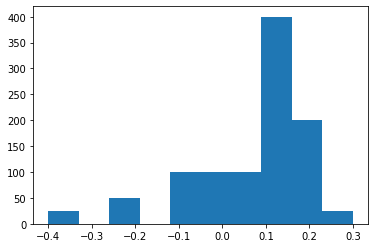

In [29]:
plt.figure();
plt.hist(sample);
plt.show();


In [28]:
mu = np.mean(sample)
sigma = np.std(sample)
g = stats.skew(sample)
k = stats.kurtosis(sample)
print(round(mu, 3))
print(round(sigma, 3))
print(round(g, 3))
print(round(k, 3))

0.072
0.137
-1.323
1.953


In [7]:
quants = np.quantile(sample, [0.01, 0.05]);

print("The 1% and 5% quantiles")
print(quants)

# Using teh second definition fails:
# print(np.mean(sample[sample < quants[0]]))

# Expected shortfall
exp_shortfall = np.array([(-0.4*0.01) / 0.01, (-0.4*0.025 -0.2*0.025)/0.05])
print("The 1% and 5% conditional expectation")
print(exp_shortfall)
print("The Value-at-Risk")
print(quants*100);

print("The conditional expected shortfall")
print(exp_shortfall*100)

The 1% and 5% quantiles
[-0.4 -0.2]
The 1% and 5% conditional expectation
[-0.4 -0.3]
The Value-at-Risk
[-40. -20.]
The conditional expected shortfall
[-40. -30.]


,rate
2,5.03%
3,3.59%
4,1.87%
5,-0.14%
6,-2.46%
7,-5.01%
8,-7.68%
9,-10.34%
10,-12.88%
11,-15.21%


\begin{tabular}{lr}
\toprule
{} &        rate \\
\midrule
2  &       5.03\% \\
3  &       3.59\% \\
4  &       1.87\% \\
5  &      -0.14\% \\
6  &      -2.46\% \\
7  &      -5.01\% \\
8  &      -7.68\% \\
9  &     -10.34\% \\
10 &     -12.88\% \\
11 &     -15.21\% \\
12 &     -17.31\% \\
13 &     -19.16\% \\
14 &     -20.79\% \\
\bottomrule
\end{tabular}

The breakeven risk-free asset is 5.03%
The investor is willing to forfeit 2.22% in expected return


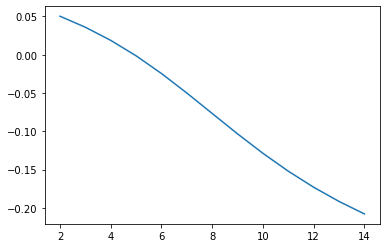

In [52]:
def utility(w, gamma = 2):
    return np.power(w, 1 - gamma)/(1 - gamma)

def inverse_utility(u, gamma = 2):
    return np.exp(np.log(u*(1 - gamma))/(1 - gamma))


# Test the inverse utility function
# print(inverse_utility(utility(400)));

# 100% either in risky or risk-free

gamma_range = range(2, 15)
rf = pd.Series(data = np.zeros(len(gamma_range)),
               index = gamma_range,
               name = "rate")

W0 = 100

rf = [inverse_utility(np.mean([utility((1 + x) * W0, ra) for x in sample]), ra)/W0 - 1 for ra in gamma_range]
"""
for ra in gamma_range:
    expected_utility = np.mean([utility((1 + x) * W0, ra) for x in sample])
    rf[ra] = inverse_utility(expected_utility, ra) / W0 - 1
"""
    
pf = pd.DataFrame(data = rf, index = gamma_range)
pf.columns = ['rate']

pf.style.format({"rate": lambda x: "{:.2%}".format(x)})
display(pf.style.format({"rate": lambda x: "{:.2%}".format(x)}))
print(pf.to_latex(float_format=lambda x: '%10.2f%%' % (x*100)))

print('The breakeven risk-free asset is %.2f%%' % (pf.loc[2] * 100))

print('The investor is willing to forfeit %.2f%% in expected return' % ((mu - pf.loc[2])*100))

plt.figure();
plt.plot(pf);
plt.show();

# The utility increases with gamma > 2

In [60]:
gamma = 2;
# Start investing all the wealth in the risk-less asset at approx 7.2% return
# it is higher than the equivalent risk-free interest rate providing the same
# utility as the expectation of the utility of the risky return.

rf_range = np.arange(0.000, 0.074, 0.005)

pi_star = pd.Series(data = None, index = rf_range, name = "Pi*")

for rf in rf_range:
    utility_pi = {};
    # invest pi in the risk-less assets
    for pi in np.arange(0, 1 + 0.05, 0.05):
        
        utility_pi[pi] = np.mean([utility((1 + x) * W0 * (1 - pi) +
                              (1 + rf) * W0 * pi, gamma) for x in sample]);
    pi_star[rf] = max(utility_pi, key = utility_pi.get);
    
display(pi_star)

/Users/daniel/Documents/Courses/investments/assignments/hw2/python/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


0.000    0.00
0.005    0.00
0.010    0.00
0.015    0.00
0.020    0.00
0.025    0.05
0.030    0.10
0.035    0.20
0.040    0.30
0.045    0.35
0.050    0.45
0.055    0.55
0.060    0.70
0.065    0.80
0.070    0.95
Name: Pi*, dtype: float64

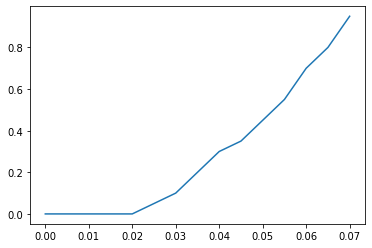

,Pi*
rf,
0.0,0.0
0.005,0.0
0.01,0.0
0.015,0.0
0.02,0.0
0.025,0.05
0.03,0.1
0.035,0.2
0.04,0.3


\begin{tabular}{lr}
\toprule
{} &        Pi* \\
rf    &            \\
\midrule
0.000 &       0.00 \\
0.005 &       0.00 \\
0.010 &       0.00 \\
0.015 &       0.00 \\
0.020 &       0.00 \\
0.025 &       5.00 \\
0.030 &      10.00 \\
0.035 &      20.00 \\
0.040 &      30.00 \\
0.045 &      35.00 \\
0.050 &      45.00 \\
0.055 &      55.00 \\
0.060 &      70.00 \\
0.065 &      80.00 \\
0.070 &      95.00 \\
\bottomrule
\end{tabular}

The breakeven risk-free asset is 5.03%
The investor is willing to forfeit 2.22% in expected return


In [71]:
plt.figure()
plt.plot(pi_star)
plt.show()

pi = pd.DataFrame(data = pi_star, index = rf_range)
pi.index.names = ['rf']

display(pi.style.format({"Pi*": lambda x: "{:.2}".format(x)}))
print(pi.to_latex(float_format=lambda x: '%10.2f' % (x*100)))

print('The breakeven risk-free asset is %.2f%%' % (pf.loc[2] * 100))

print('The investor is willing to forfeit %.2f%% in expected return' % ((mu - pf.loc[2])*100))


In [10]:
class C1(object):
    x = 23
    
print(C1.x, "este x")
print(C1.__name__)

print(C1.__bases__)

23 este x
C1
(<class 'object'>,)


In [11]:

display(rf)
rf.unique()
rf[(rf > 0.00) & (rf < 0.04)]

0.07300000000000001

AttributeError: 'numpy.float64' object has no attribute 'unique'